**Aim:** Analyze whether discriminative or generative classifiers are best suitable for doing classification on wine dataset.
Make decision boundaries to demonstrate the working of both type of classifiers.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

In [ ]:
wine = load_wine()
x = wine.data
y = wine.target

In [ ]:
x[:5]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

In [ ]:
y[:5]

array([0, 0, 0, 0, 0])

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 47)

In [ ]:
#Creating a NB classifier
nb = GaussianNB()
nb.fit(xtrain, ytrain)
ypred = nb.predict(xtest)
accuracy_score(ypred, ytest)

0.9555555555555556

In [ ]:
#Creating a logistic classifier
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)
accuracy_score(ytest, ypred)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9333333333333333

In [ ]:
#Creating a function to plot the decision boundary
def plot_db(model, x, y, ax, title, acc):
  xmin, xmax = x[:, 0].min()-1, x[:,0].max()+1
  ymin, ymax = x[:, 1].min()-1, x[:, 1].max() +1
  xx,yy = np.meshgrid(np.linspace(xmin, xmax, 200), np.linspace(ymin, ymax, 200))
  print(xx.shape)
  print(yy.shape)

  #Predicting probability for class 1
  z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
  z = z.reshape(xx.shape)

  #Probability heatmap
  contour = ax.contourf(xx, yy, z, alpha = 0.5, cmap = plt.cm.coolwarm)

  #Decision boundary
  boundary = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
  ax.contour(xx, yy, boundary, colors = "k", linewidths = 1)

  #Data points
  ax.scatter(x[:, 0], x[:, 1], c = y, edgecolor = "k", cmap = plt.cm.coolwarm)
  ax.set_title(f"{title}\nAccuracy: {acc:.2f}")

In [ ]:
#PCA to decompose the dataset to 2 features only
pca = PCA(n_components=2)
x_new = pca.fit_transform(x)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x_new, y, test_size = 0.25, random_state = 47)

In [ ]:
#Creating a NB classifier
nb = GaussianNB()
nb.fit(xtrain, ytrain)
ypred = nb.predict(xtest)
accuracy_score(ypred, ytest)

0.7555555555555555

In [ ]:
#Creating a logistic classifier
lr = LogisticRegression()
lr.fit(xtrain, ytrain)
ypred = lr.predict(xtest)
accuracy_score(ytest, ypred)

0.6666666666666666

In [ ]:
ypred_nb = nb.predict(xtest)
ypred_lr = lr.predict(xtest)
acc_nb = accuracy_score(ytest, ypred_nb)
acc_lr = accuracy_score(ytest, ypred_lr)

(200, 200)
(200, 200)
(200, 200)
(200, 200)


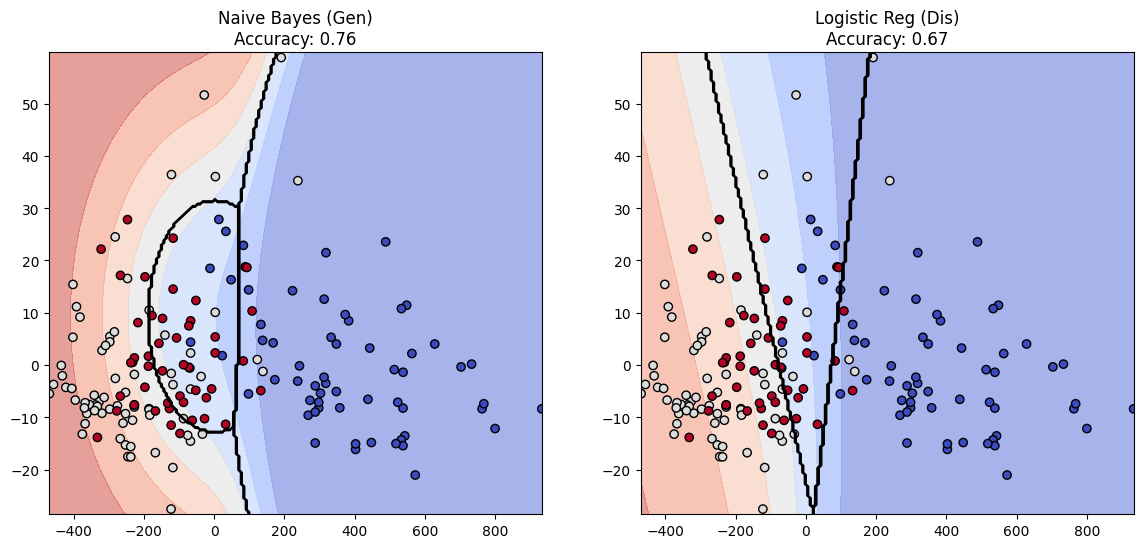

In [ ]:
fig, axes = plt.subplots(1,2, figsize = (14,6))
plot_db(nb, x_new, y, axes[0], "Naive Bayes (Gen)", acc_nb)
plot_db(lr, x_new, y, axes[1], "Logistic Reg (Dis)", acc_lr)
plt.show()

In [ ]:
np.unique(y)

array([0, 1, 2])